# Waze Partner Feed Data Analysis

#### Waze data password: DBL0XHWBRYP31I5F

In [18]:
import requests, json, os
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns; sns.set()
from datetime import datetime

### Waze partner feed request

In [3]:
waze_url = 'https://www.waze.com/partnerhub-api/waze-feed-access-token/c37c11ba-ff9d-4ad5-8ecc-4e4f12e91efb?format=1'

incidents = requests.get(waze_url).json()

keys = list(incidents.keys())

alerts = pd.DataFrame(incidents[keys[0]])
jams = pd.DataFrame(incidents[keys[-1]])

# Data cleaning & preprocessing
for df in [alerts, jams]:    
    df['pubMillis'] = (df['pubMillis'] / 1000).map(datetime.fromtimestamp)
    df.sort_values('pubMillis', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [26]:
(df['uuid'] / 1000).map(datetime.fromtimestamp)

0     1970-01-08 17:20:07.620
1     1970-01-08 17:20:01.700
2     1970-01-08 17:20:01.694
3     1970-01-08 17:19:55.352
4     1970-01-08 17:19:56.282
                ...          
599   1970-01-20 02:21:21.454
600   1970-01-22 09:23:03.492
601   1969-12-31 21:07:27.444
602   1970-01-19 17:08:39.982
603   1970-01-19 17:08:41.904
Name: uuid, Length: 604, dtype: datetime64[ns]

### Reponse latest alerts

In [11]:
alerts[['type', 'subtype', 'confidence', 'reliability', 'street', 'location', 'pubMillis']]

,type,subtype,confidence,reliability,street,location,pubMillis
0,JAM,JAM_STAND_STILL_TRAFFIC,0,5,BR-116 N Rod. Pres. Dutra,"{'x': -43.852252, 'y': -22.668605}",2022-10-06 11:44:01
1,WEATHERHAZARD,HAZARD_ON_SHOULDER_CAR_STOPPED,0,5,Al. São Boaventura,"{'x': -43.096057, 'y': -22.881063}",2022-10-06 11:44:00
2,JAM,JAM_STAND_STILL_TRAFFIC,0,5,NaN,"{'x': -43.213729, 'y': -22.896519}",2022-10-06 11:43:59
3,JAM,JAM_HEAVY_TRAFFIC,0,5,R. Visconde de Itamarati,"{'x': -43.231196, 'y': -22.916274}",2022-10-06 11:43:57
4,JAM,,0,5,NaN,"{'x': -43.239921, 'y': -22.844743}",2022-10-06 11:43:55
...,...,...,...,...,...,...,...
637,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,NaN,"{'x': -43.207042, 'y': -22.910151}",2022-06-17 17:00:50
638,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,R. Marquês de Sapucaí,"{'x': -43.197893, 'y': -22.907648}",2022-06-14 13:07:49
639,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,NaN,"{'x': -43.36483, 'y': -22.837585}",2022-05-14 11:08:23
640,ROAD_CLOSED,ROAD_CLOSED_EVENT,5,10,NaN,"{'x': -43.330305, 'y': -23.007484}",2022-02-02 20:14:45


In [14]:
jams

,country,city,level,line,speedKMH,length,turnType,type,uuid,endNode,speed,segments,roadType,delay,street,pubMillis,blockingAlertUuid
0,BR,Rio de Janeiro,4,"[{'x': -43.290143, 'y': -22.897684}, {'x': -43...",3.35,171,NONE,NONE,678007620,R. Adriano,0.930556,[{}],1,158,R. Paulo Silva Araújo,2022-10-06 11:44:08.579,NaN
1,BR,Rio de Janeiro,2,"[{'x': -43.646541, 'y': -22.950835}, {'x': -43...",7.99,317,NONE,NONE,678001700,R. Manimbu,2.219444,"[{}, {}, {}]",1,75,R. Itatinga,2022-10-06 11:44:08.479,NaN
2,BR,Rio de Janeiro,3,"[{'x': -43.631973, 'y': -22.920165}, {'x': -43...",5.68,214,NONE,NONE,678001694,Est. Santa Eugênia,1.577778,[{}],1,92,R. Manoel Ventura,2022-10-06 11:44:08.453,NaN
3,BR,Niterói,3,"[{'x': -43.122343, 'y': -22.891238}, {'x': -43...",6.91,321,NONE,NONE,677995352,R. da Conceição,1.919444,"[{}, {}]",1,105,R. Visconde do Uruguai,2022-10-06 11:44:08.117,NaN
4,BR,Niterói,3,"[{'x': -43.121135, 'y': -22.894231}, {'x': -43...",8.07,338,NONE,NONE,677996282,R. Visconde de Itaboraí,2.241667,"[{}, {}, {}, {}]",2,95,R. Maestro Felício Toledo,2022-10-06 11:44:07.621,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,BR,Rio de Janeiro,5,"[{'x': -43.217523, 'y': -22.972236}, {'x': -43...",0.00,15,NONE,NONE,1660881454,NaN,0.000000,[{}],2,-1,Av. Borges de Medeiros,2022-09-01 10:39:14.443,7e953608-488b-4679-bb70-46262df1ace9
600,BR,Rio de Janeiro,5,"[{'x': -43.20844, 'y': -22.900073}, {'x': -43....",0.00,168,NONE,NONE,1858983492,Av. Francisco Bicalho,0.000000,[{}],2,-1,NaN,2022-08-31 22:01:24.976,0eb61673-0038-401c-b80a-ce23b23959dc
601,BR,Rio de Janeiro,5,"[{'x': -43.36483, 'y': -22.837585}, {'x': -43....",0.00,202,NONE,NONE,447444,Est. João Paulo,0.000000,[{}],2,-1,NaN,2022-08-19 10:32:18.940,3c429ca3-cd66-4dcf-9f5e-5fe8a8ff4acb
602,BR,Rio de Janeiro,5,"[{'x': -43.344944, 'y': -22.805179}, {'x': -43...",0.00,107,NONE,NONE,1627719982,BR-116 N Rod. Pres. Dutra,0.000000,[{}],4,-1,NaN,2022-08-16 03:10:54.006,acac375b-04fc-44f5-813b-772b9ddf9a87


---
# Exploratory Data Analysis

### Number of alerts

In [5]:
alerts.shape

(642, 15)

### Date time range

In [6]:
alerts['pubMillis'].min(), alerts['pubMillis'].max()

(Timestamp('2022-01-04 08:51:09'), Timestamp('2022-10-06 11:44:01'))

### Alert types

WEATHERHAZARD    431
JAM              165
ROAD_CLOSED       34
ACCIDENT          12
Name: type, dtype: int64

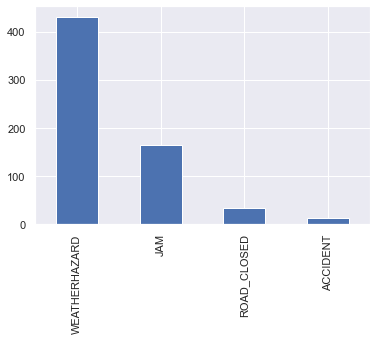

In [22]:
display(alerts['type'].value_counts())
ax = alerts['type'].value_counts().plot.bar()

### Alert Subtypes

HAZARD_ON_ROAD_POT_HOLE               247
JAM_STAND_STILL_TRAFFIC                90
HAZARD_ON_ROAD_CONSTRUCTION            81
JAM_HEAVY_TRAFFIC                      53
ROAD_CLOSED_EVENT                      34
HAZARD_ON_ROAD_CAR_STOPPED             29
HAZARD_ON_SHOULDER                     28
                                       19
HAZARD_ON_SHOULDER_CAR_STOPPED         19
JAM_MODERATE_TRAFFIC                   12
HAZARD_ON_ROAD_TRAFFIC_LIGHT_FAULT      9
ACCIDENT_MINOR                          7
HAZARD_ON_ROAD_OBJECT                   5
HAZARD_ON_SHOULDER_MISSING_SIGN         4
HAZARD_ON_ROAD                          2
HAZARD_ON_SHOULDER_ANIMALS              1
ACCIDENT_MAJOR                          1
HAZARD_ON_ROAD_ROAD_KILL                1
Name: subtype, dtype: int64

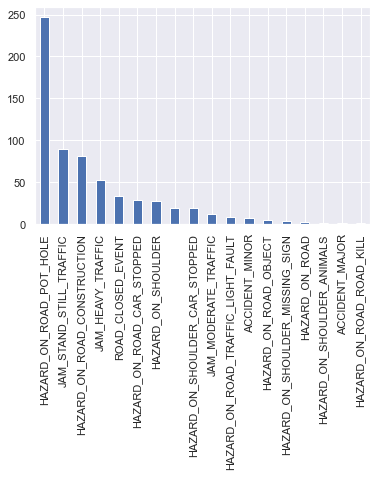

In [25]:
display(alerts['subtype'].value_counts())
alerts['subtype'].value_counts().plot.bar()